In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline
# base =  
plt.rcParams['figure.dpi']= 300

In [18]:


def read_dttable(base):
    a = np.loadtxt(base + 'dt_table_test.dat')
    df = pd.DataFrame(a, columns=['dt', 'energy', 'accept', 'tcpu', 'solver'])

    fig, [ax1,ax2] = plt.subplots(1,2, figsize = [16,9])
    ax1.semilogx(df.dt, df.energy,'o')
    ax1.set_xlabel('dt'); ax1.set_ylabel('energy')
    ax2.semilogx(df.dt, df.accept,'o')
    ax2.set_xlabel('dt'); ax2.set_ylabel('acceptance')
    return df

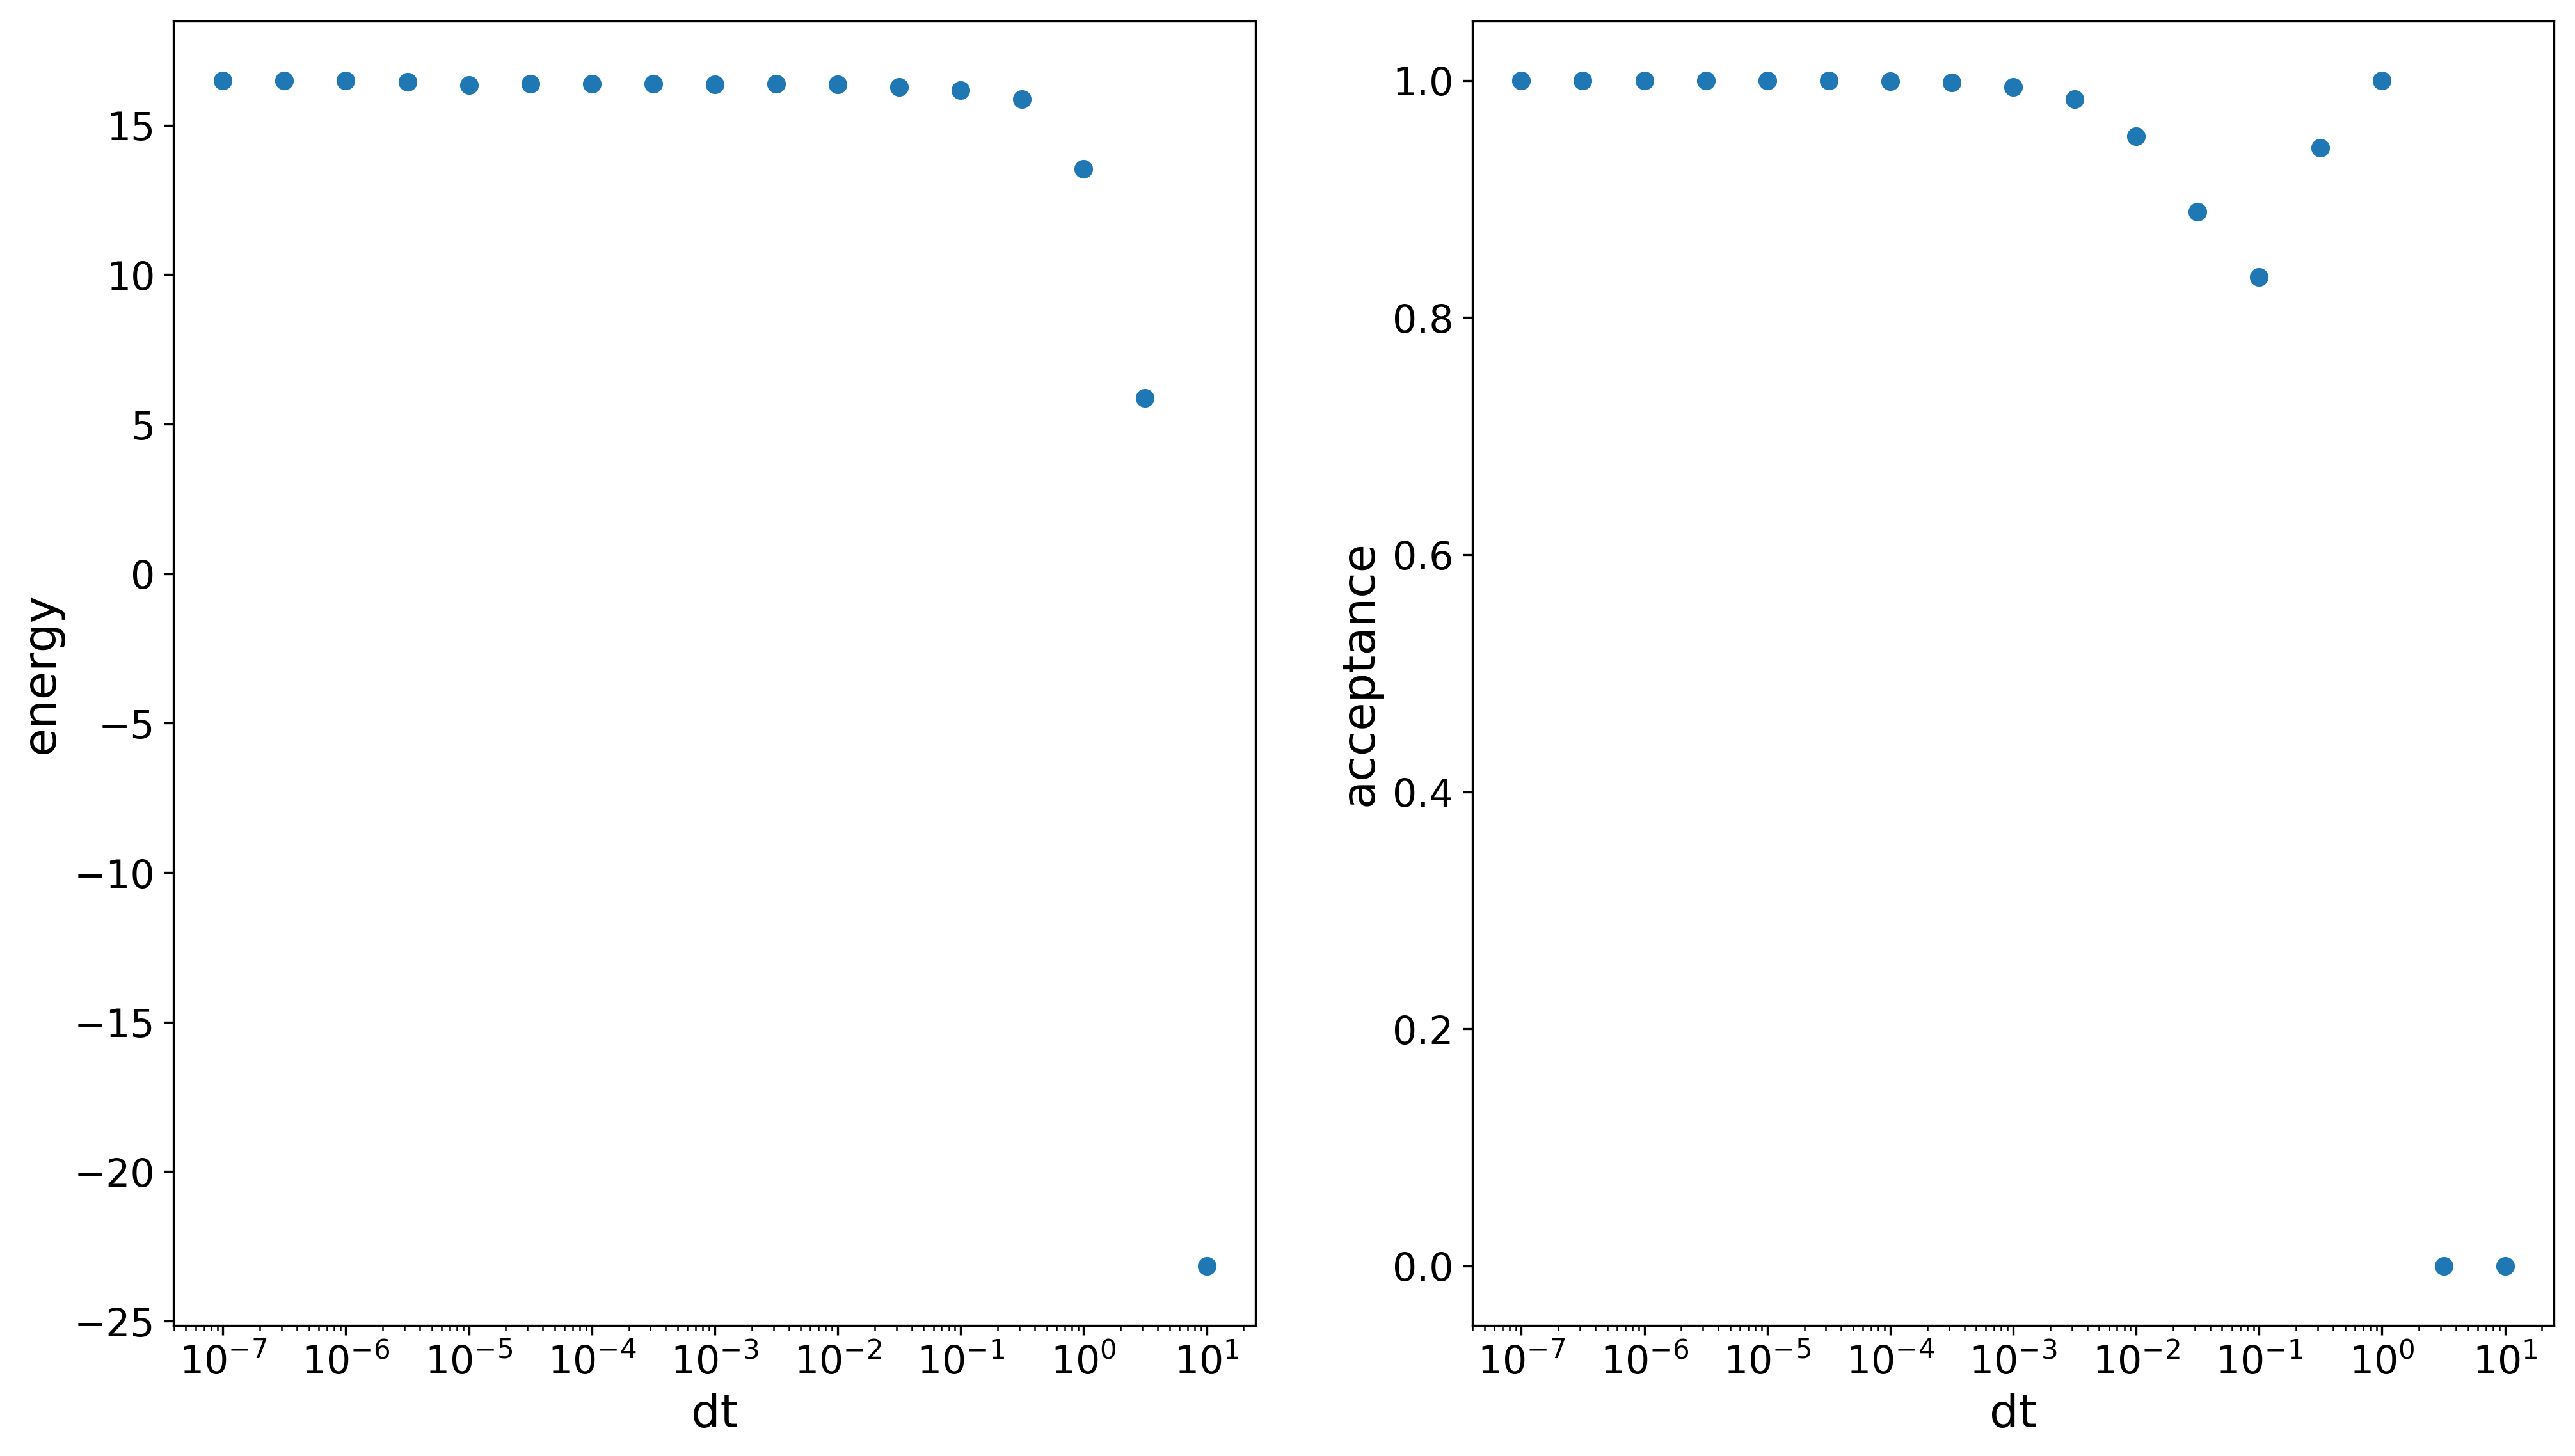

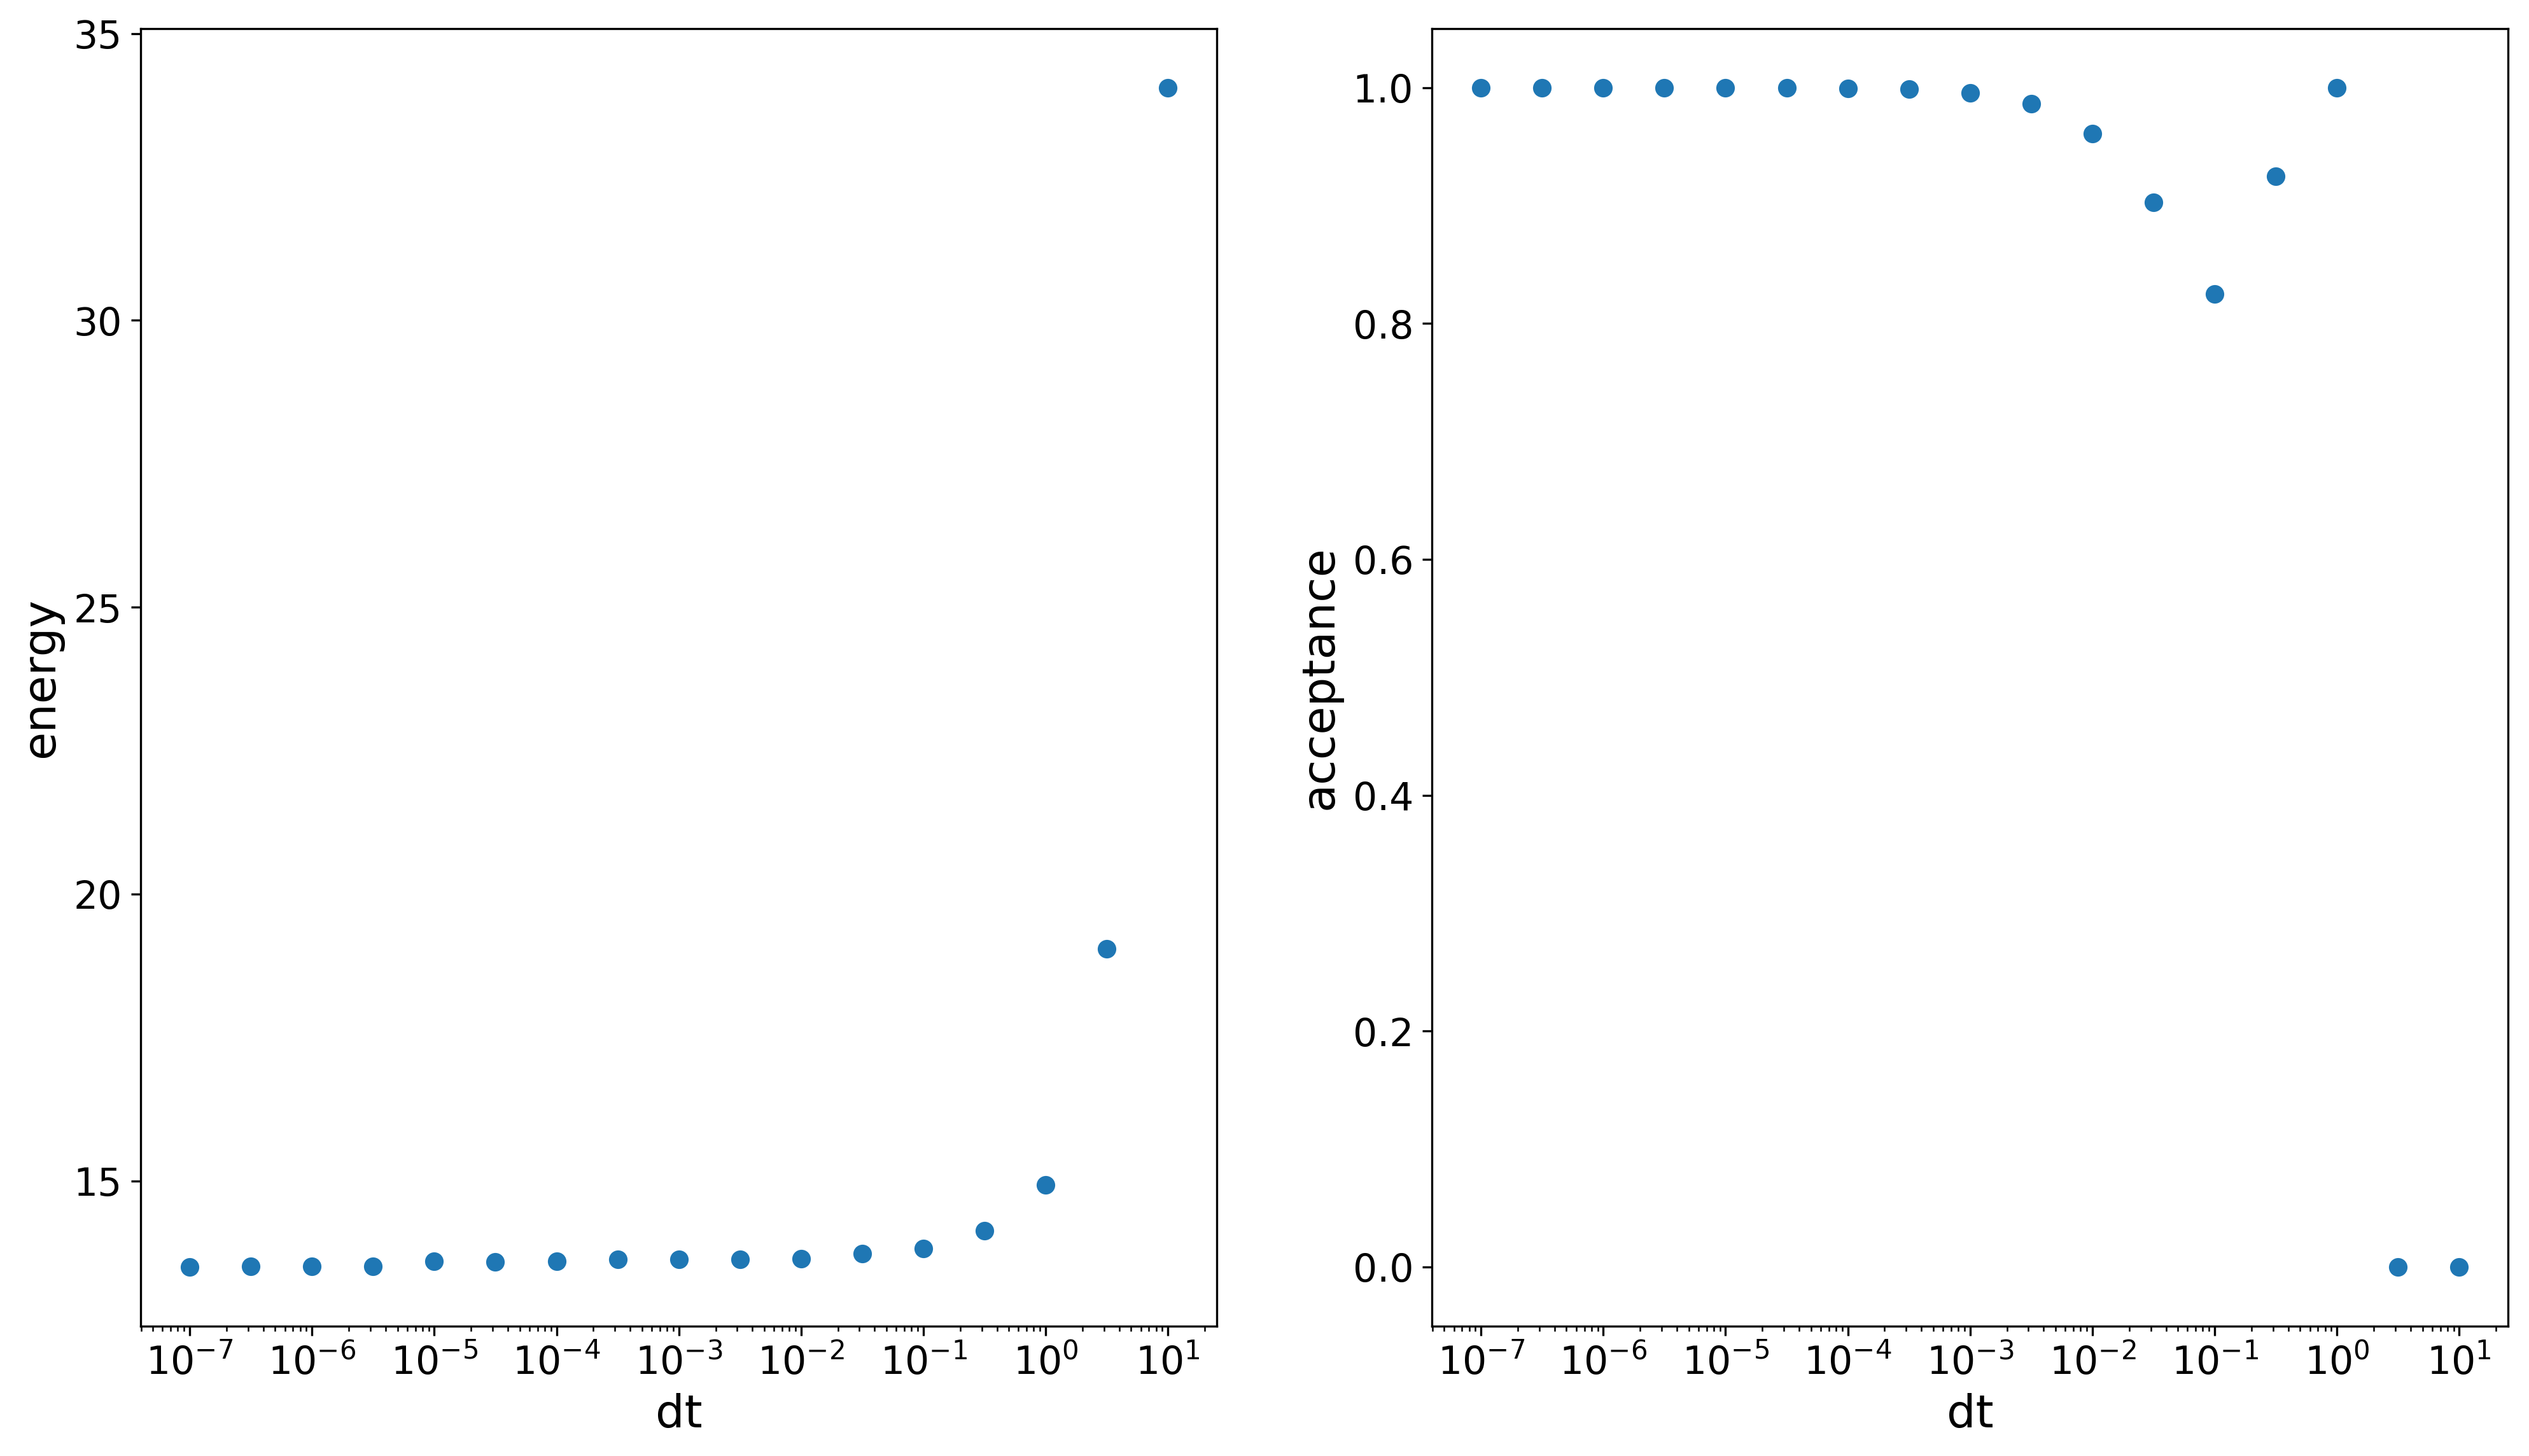

In [19]:
base1 = '../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/alpha0_55/'
base2 = '../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/alpha0_45/'
alpha055 = read_dttable(base1)
alpha045 = read_dttable(base2)


In [20]:
def name_dat_file(directory):
    filenames = [f for f in glob.glob(directory  + '*.dat') if not 'dt_table_test' in f]
    #for f in filenames:
    #    np.loadtxt(f)
    return filenames

In [21]:
# create a list of files which have the enrgy data
filenames045 = name_dat_file(base1)
filenames055 = name_dat_file(base2)


In [22]:
df = pd.DataFrame()
for f in filenames045:
    df[f] = pd.read_csv(f, delim_whitespace=True)
    # plt.plot(a)

df.columns = pd.to_numeric(df.columns.str.split('/').str[-1].str.strip('.dat'))

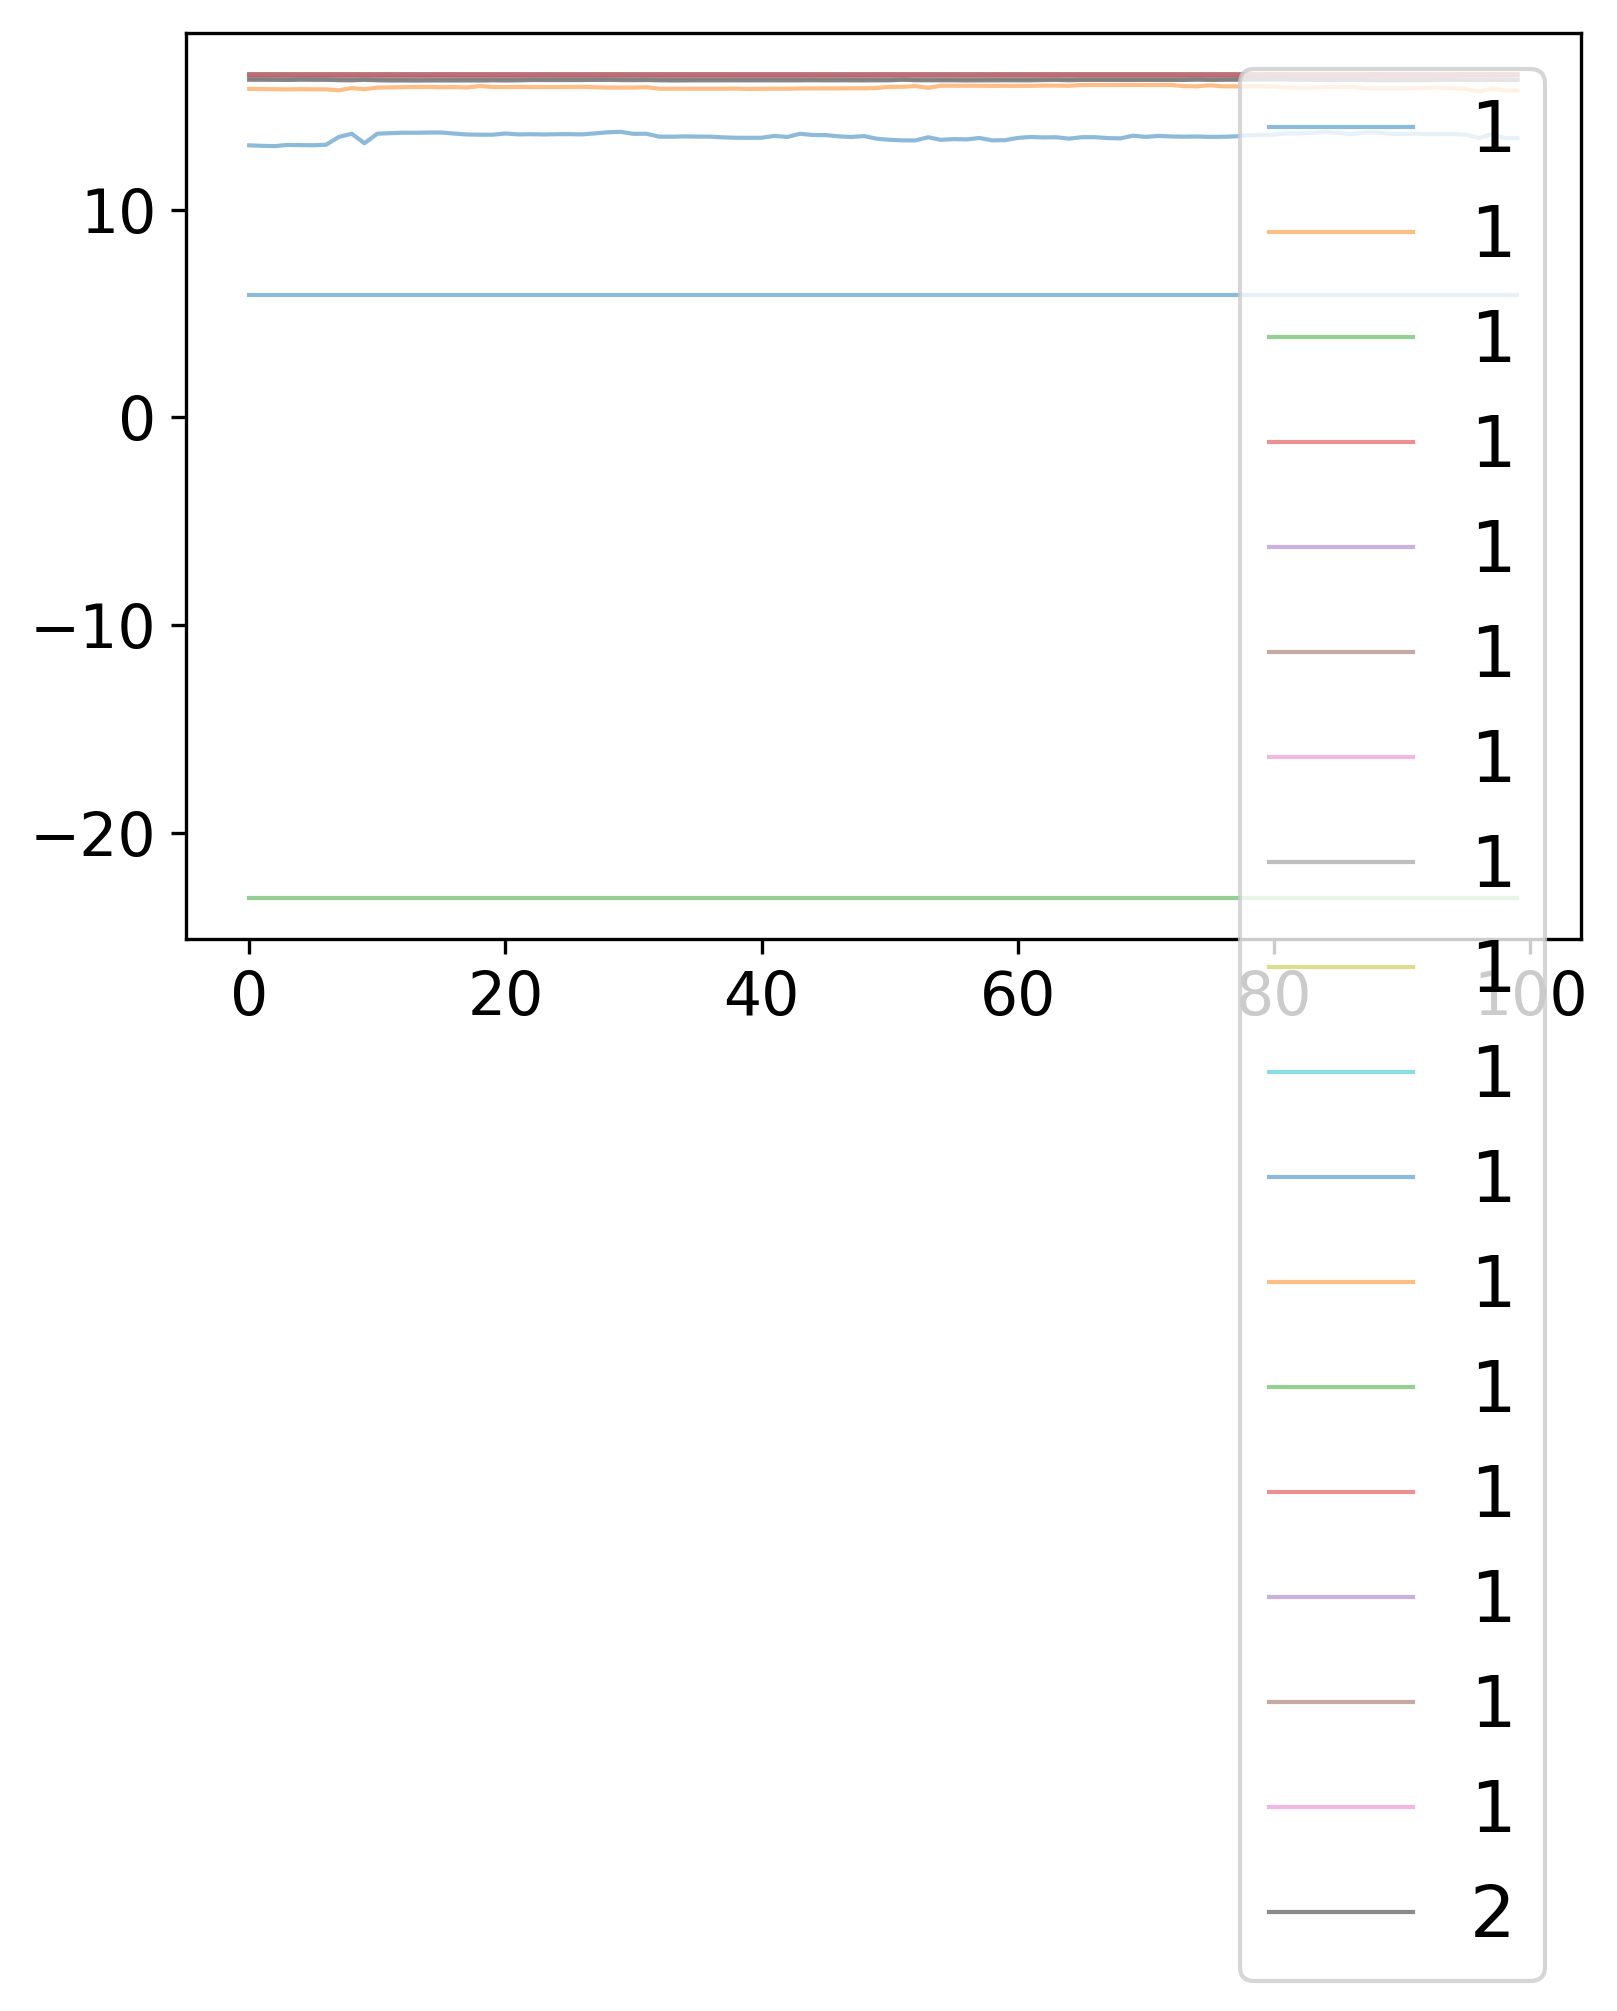

In [23]:
plt.plot(df.iloc[:100],alpha=0.5, linewidth = 1, label = '1')
plt.plot(df[-1][:100],alpha=0.9, linewidth = 1, label = '2')
plt.legend()

In [8]:
[print(i, ~i) for i in range(5)]

a = [1,2,3,4,5]
#a[]

0 -1
1 -2
2 -3
3 -4
4 -5


In [9]:
def block_mean(vec):
    return sum(vec)/len(vec)

def meanAndVariance(vec):
    mean = np.mean(vec)
#     var = np.var(vec)
#     mean = sum(vec)/len(vec)
    var = sum([i ** 2 for i in vec])/len(vec) - mean*mean
    return mean, var

In [16]:
def buildingblocks(filenames, wfile='blocking_taskc.txt'):
    
    outfile =  open(wfile, 'w')
    outfile.write("#Filename     Energy     Variance \n")

    # import os
    for filename in filenames: # os.listdir("/Users/frida/Happyday/FYS4411/build-Project1-Desktop_Qt_5_9_1_clang_64bit-Release/c_dt_50vals"):
        data = [float( line.rstrip('\n')) for line in open(filename)]
        n_blocks = 200
        block_size_min = 100
        block_size_max = len(data)/100
        block_step = int ((block_size_max - block_size_min + 1) / n_blocks)
        mean_vec = []
        var_vec = []
        block_sizes = []
        for i in range(0, n_blocks):
            mean_temp_vec = []
            start_point = 0
            end_point = block_size_min + block_step*i
            block_size = end_point
            block_sizes.append(block_size)

        mean_temp_vec.append(block_mean(data[start_point:end_point]))
        start_point = end_point
        end_point += block_size_min + block_step*i
        mean, var = meanAndVariance(mean_temp_vec)
        mean_vec.append(mean)
        var_vec.append(np.sqrt( var/(len(data)/float(block_size) - 1.0)     ))
        line = []
        mean, var = meanAndVariance(data)
        line.append('{} {} {}\n'.format(filename, mean, var))
        outfile.writelines(line)

    outfile.close()

#numerical variance is shit because it scales with the size of h squared, the number of particles and the number of cycles

In [17]:
buildingblocks(filenames045,'blocking_taskc_a045.txt')
buildingblocks(filenames055, 'blocking_taskc_a055.txt')

In [ ]:
def read_energy(filenames):
    

In [2]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (5, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [13]:
def read_blocking(name,accept):
    df = pd.read_csv(name, delim_whitespace=True)
    df = df.assign(dt = pd.to_numeric(df['#Filename'].str.split('/').str[-1].str.strip('.dat')))
    df = df.sort_values('dt').reset_index(drop=True)
    df = df.assign(accept = accept)
    df = df.drop('#Filename', axis=1)
    df = df[['dt', 'Energy', 'Variance', 'accept']]
    df.columns = df.columns.str.lower()


    df.dt =  10**(df.dt)
    #df = df[df.dt < 1]
 
    return df

In [14]:
block045 = read_blocking('c/blocking_taskc_a045.txt',alpha045.accept)

block055 = read_blocking('c/blocking_taskc_a055.txt',alpha055.accept)

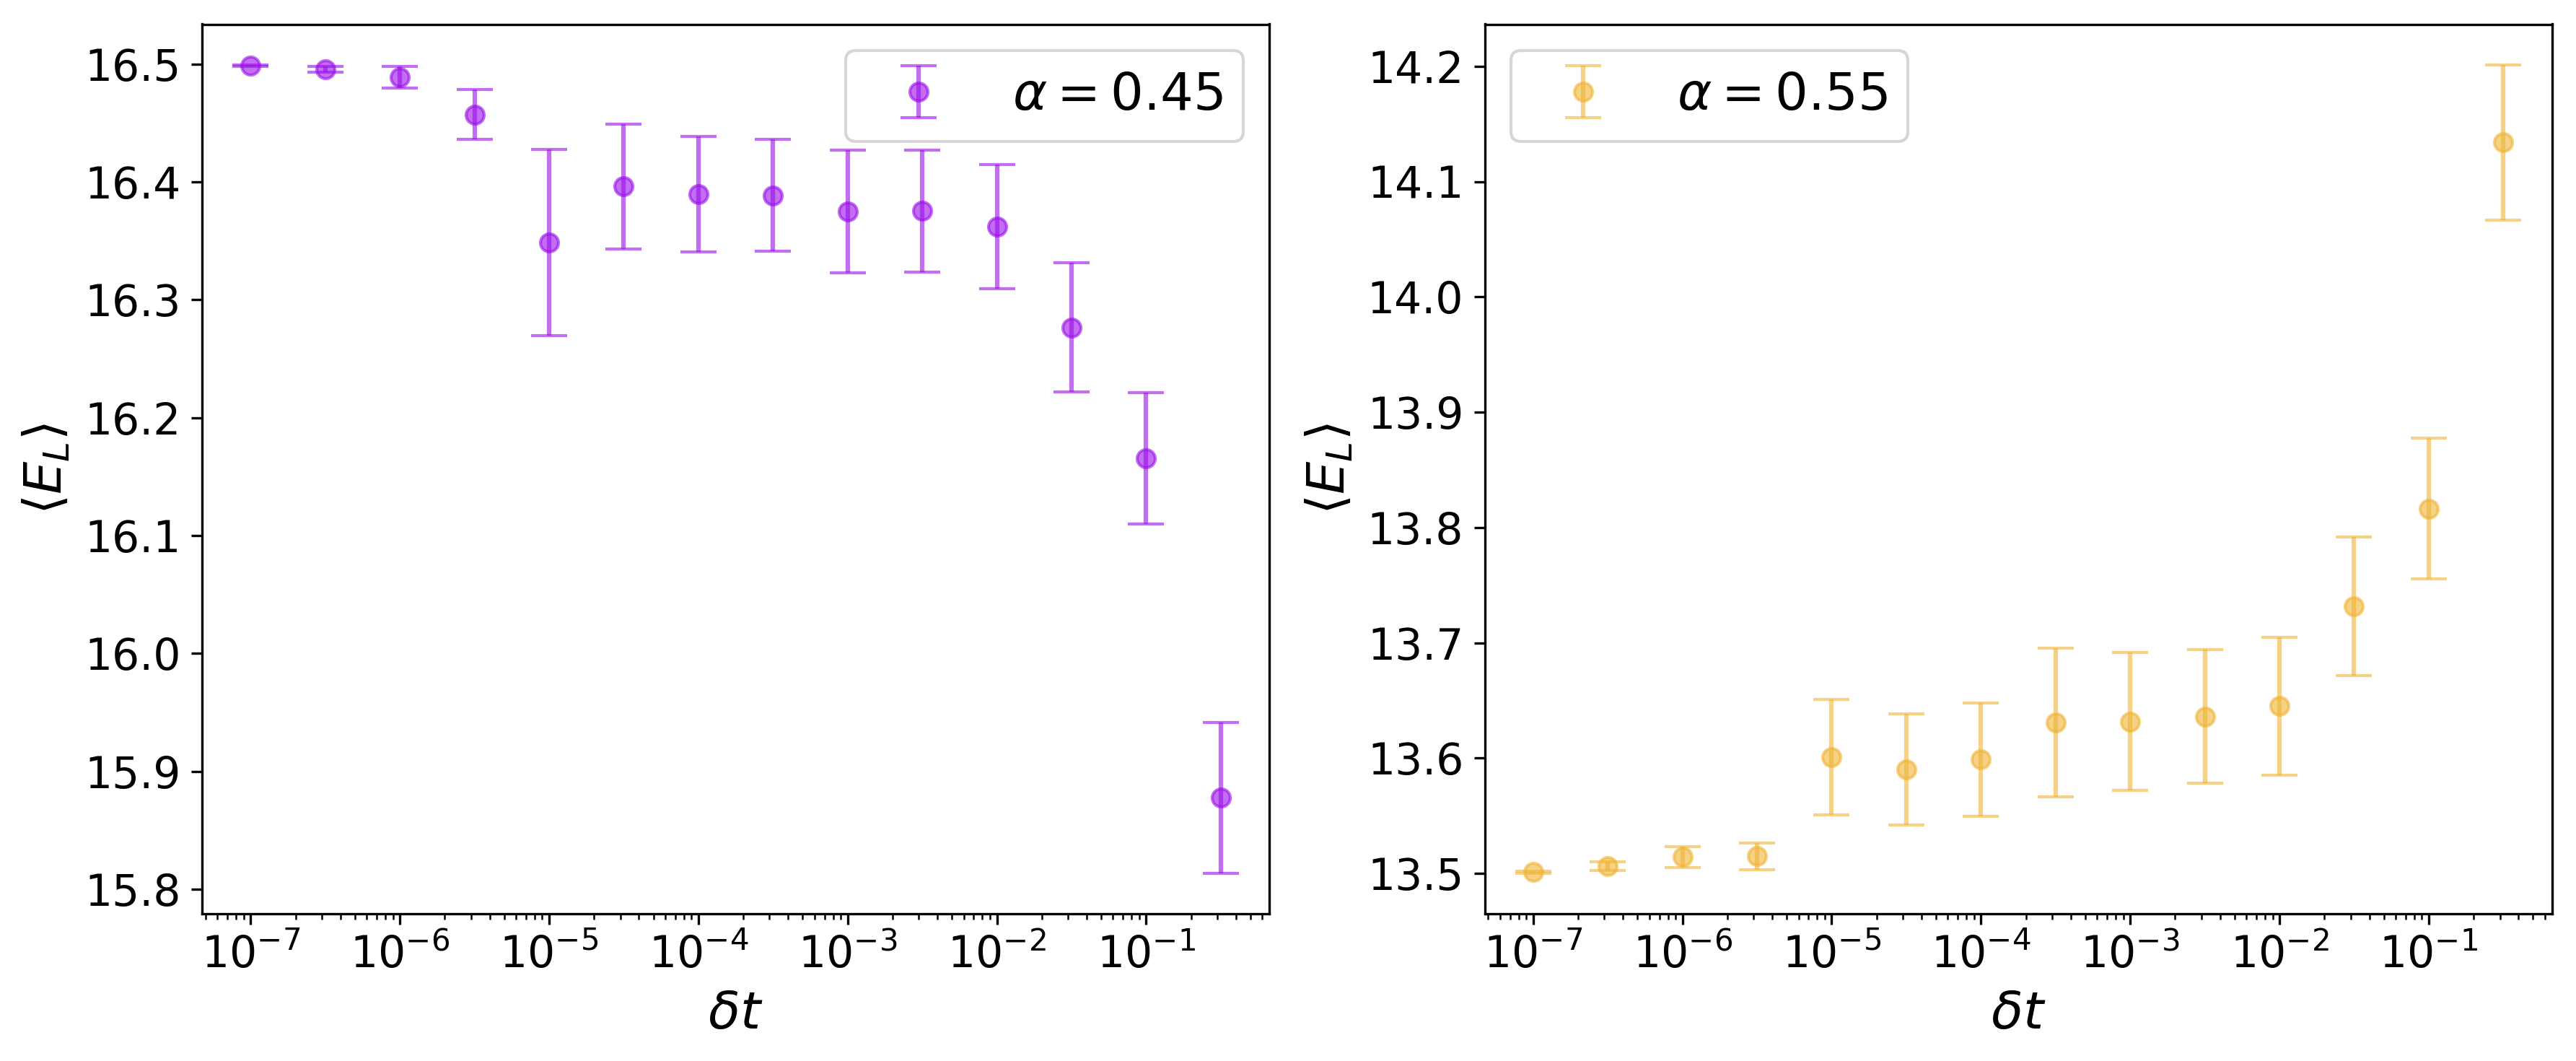

In [12]:
# block045.plot(x = 'Energy', y = 'Variance')
fig, [ax1,ax2]= plt.subplots(1,2,figsize = [12,5])
ax1.set_xscale("log", nonposx='clip',)
ax2.set_xscale("log", nonposx='clip')

ax1.errorbar(block045.dt ,block045.energy, marker='o',linestyle=' ',alpha=0.6,capsize=6,color='xkcd:violet' ,yerr = np.sqrt(np.abs(block045.variance)),label=r'$\alpha = 0.45$')
ax2.errorbar(block055.dt ,block055.energy, marker='o',linestyle=' ',alpha=0.6,capsize=6,color='xkcd:macaroni and cheese' ,yerr = np.sqrt(np.abs(block055.variance)),label=r'$\alpha = 0.55$')

ax1.set_xlabel(r'$\delta t$')#,fontsize=15)
ax2.set_xlabel(r'$\delta t$')#,fontsize=15)
ax1.set_ylabel(r'$\langle E_L\rangle$')#,fontsize=15)
ax2.set_ylabel(r'$\langle E_L\rangle$')#,fontsize=15)
ax1.legend()
ax2.legend()
fig.tight_layout()

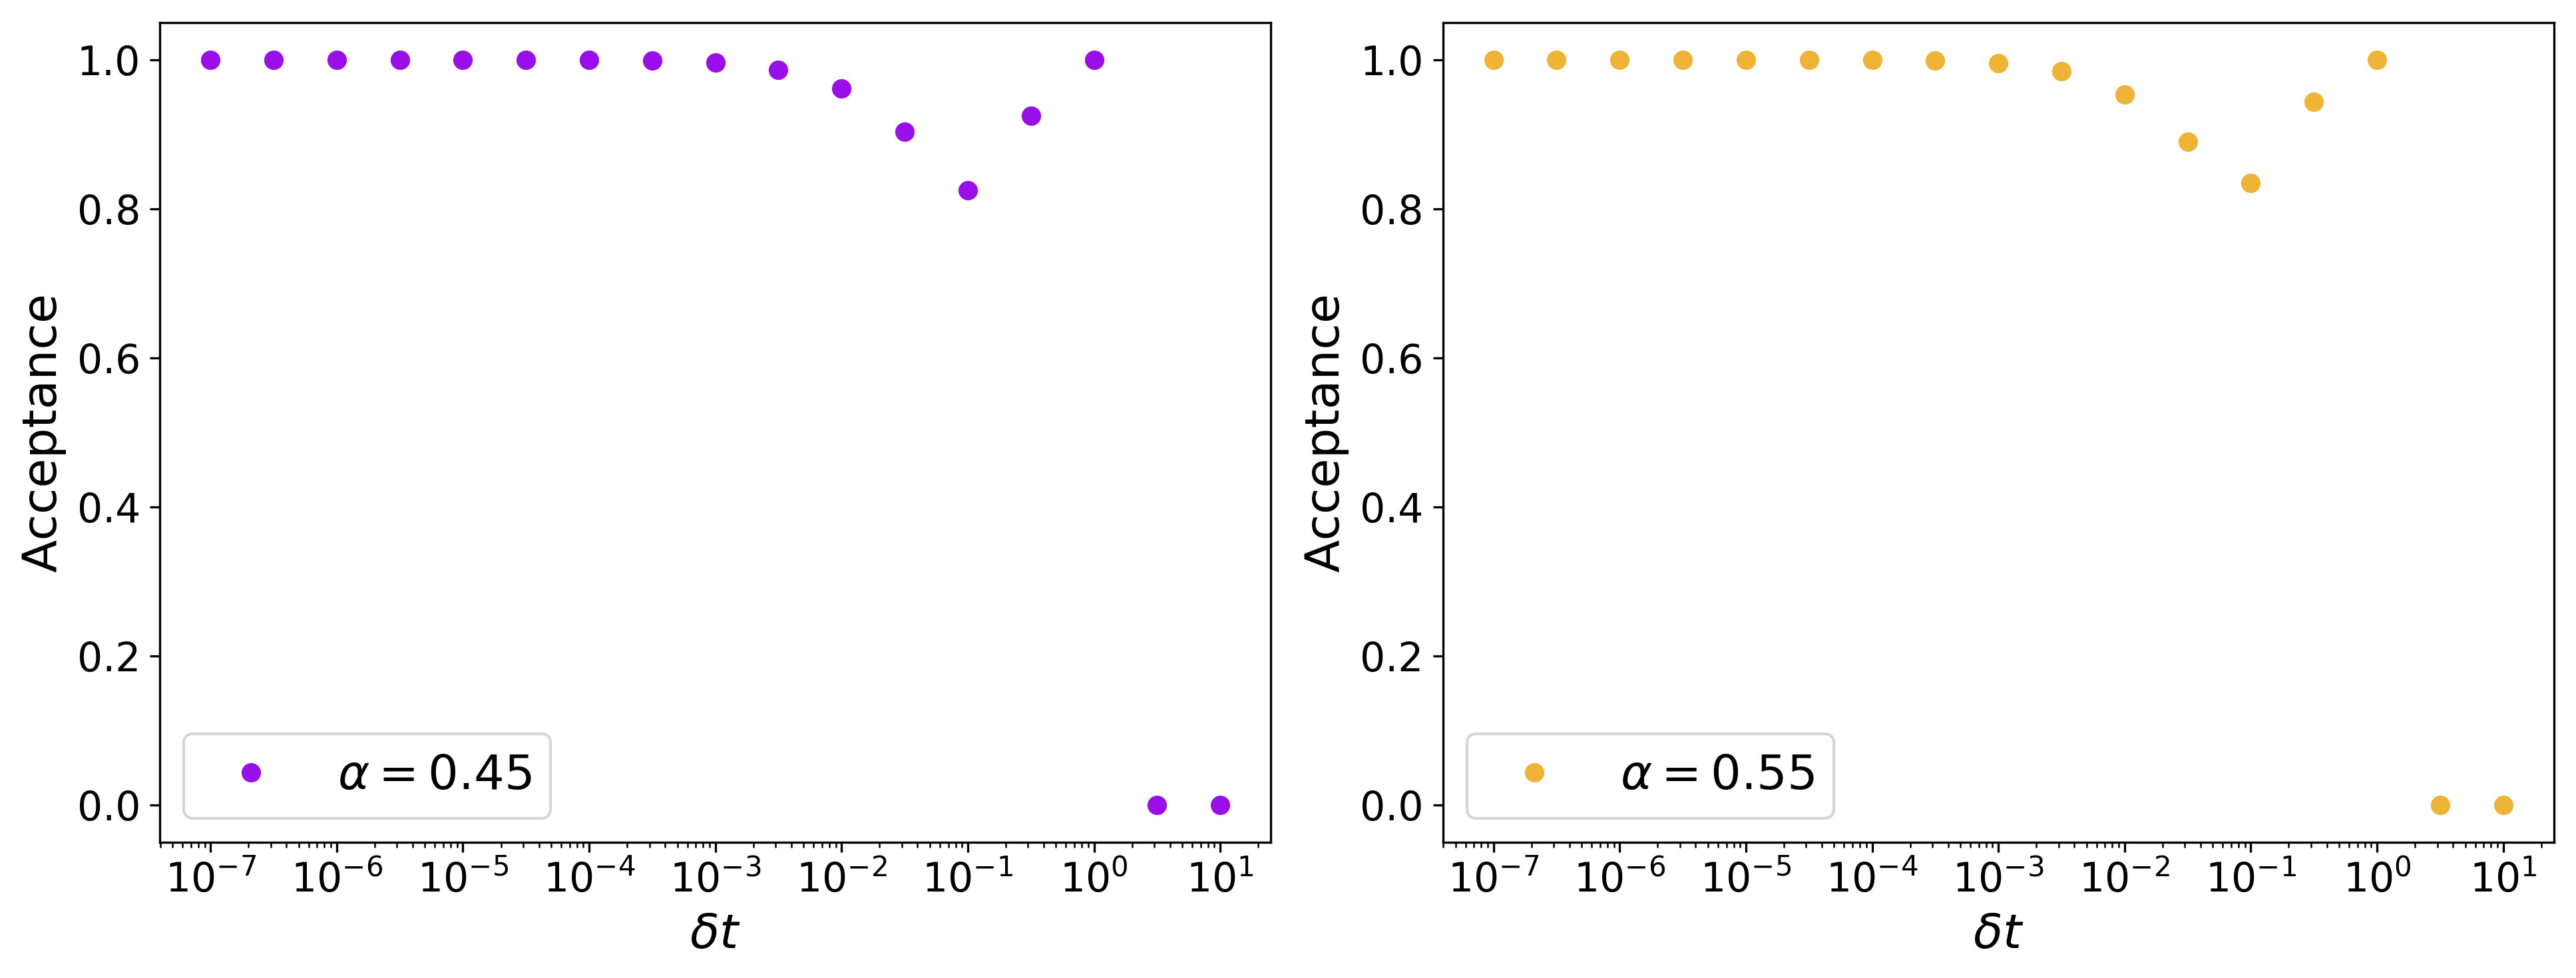

In [15]:
fig2, [ax3,ax4] = plt.subplots(1,2,figsize=[13,5])
ax3.semilogx(block045.dt ,block045.accept, marker='o',linestyle=' ', label=r'$\alpha = 0.45$',color='xkcd:violet')
ax4.semilogx(block055.dt ,block055.accept, marker='o',linestyle=' ', label=r'$\alpha = 0.55$',color='xkcd:macaroni and cheese')
ax3.set_xlabel(r'$\delta t$')#,fontsize=15)
ax4.set_xlabel(r'$\delta t$')#,fontsize=15)
ax3.set_ylabel(r'Acceptance')#,fontsize=15)
ax4.set_ylabel(r'Acceptance')#,fontsize=15)
ax3.legend()
ax4.legend()
#ax3.labelsize(medium)
fig2.tight_layout()

In [103]:
def get_a_std_4_free(df):
    df = df.assign(std=pd.Series(np.sqrt(np.abs(df.variance))).values)
    dfshort = df.drop(['variance'],axis=1)
    dfshortcols = list(block045short.columns.values)
    dfshort = dfshort[['dt', 'energy',  'std','accept']]
    return dfshort
    

In [109]:
block045short = get_a_std_4_free(block045)

block055short = get_a_std_4_free(block055)


In [66]:
def latex(df,colname):
    df = df.rename(columns=dict(zip(df, colname)))
    table = df.to_latex(index=False,escape=False,column_format=(1+ len(colname))*'c')
    table = table.replace("toprule", "hline \hline")
    table = table.replace("bottomrule", "hline \hline")
    table = table.replace("midrule", "hline")
    s = r'''\begin{table}[H]
    \centering
    \caption{}
    \label{tab:}
    '''
    table = s + table 
    table = table +'\end{table}'
    return table

In [113]:
std_cols = [r'$\delta t$', r'$\langle E_L \rangle$',r'$\sigma_b$','Acceptance']

In [115]:
print(latex(block055short,std_cols))

\begin{table}[H]
    \centering
    \caption{}
    \label{tab:}
    \begin{tabular}{ccccc}
\hline \hline
   $\delta t$ &  $\langle E_L \rangle$ &  $\sigma_b$ &  Acceptance \\
\hline
 1.000000e-07 &              13.501041 &    0.000765 &    0.999999 \\
 3.162278e-07 &              13.506254 &    0.003590 &    0.999999 \\
 1.000000e-06 &              13.514175 &    0.009222 &    0.999994 \\
 3.162278e-06 &              13.514798 &    0.011612 &    0.999991 \\
 1.000000e-05 &              13.600900 &    0.049900 &    0.999963 \\
 3.162278e-05 &              13.590189 &    0.048199 &    0.999832 \\
 1.000000e-04 &              13.598644 &    0.049211 &    0.999512 \\
 3.162278e-04 &              13.630853 &    0.064681 &    0.998309 \\
 1.000000e-03 &              13.631672 &    0.059746 &    0.994718 \\
 3.162278e-03 &              13.636048 &    0.057943 &    0.984288 \\
 1.000000e-02 &              13.645020 &    0.059590 &    0.953013 \\
 3.162278e-02 &              13.731718 &    0.05

In [ ]:
print((13*"{:.6f}\n").format(*np.logspace(-4,1,13)))

In [9]:
plt.semilogx(df.dt,np.sqrt(np.abs(df.Variance))/df.Energy,'*')

AttributeError: 'DataFrame' object has no attribute 'dt'

In [ ]:
dt, accept
df.assign(accept = accept[filenames])

In [ ]:
np.logspace(-7,1,17)